# This notebook will be used for the Coursera Capstone Project.

### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Data acquisition

In [3]:
#Download data from the coursera link
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


--2020-10-07 16:12:40--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  31.8MB/s   in 2.2s   

2020-10-07 16:12:43 (31.8 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
#Create dataframe and display first 5 rows

#data_df = pd.read_csv ('Data-Collisions.csv', parse_dates=["INCDTTM"])
data_df = pd.read_csv ('Data-Collisions.csv')

data_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data preparation

In [5]:
data_df.shape

(194673, 38)

In [6]:
#Lowercase column names

data_df.columns = map(str.lower, data_df.columns)
data_df.describe()

,severitycode,x,y,objectid,inckey,coldetkey,intkey,severitycode.1,personcount,pedcount,pedcylcount,vehcount,sdot_colcode,sdotcolnum,seglanekey,crosswalkkey
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
# Remove values in incdttm with no hour specified
data_df['incdttm_count'] = data_df['incdttm'].str.len()



In [8]:
# looking at incidents over time to see the annual distribution of the data

data_df["incdttm"] = data_df["incdttm"].astype("datetime64")
data_df["year"] = pd.DatetimeIndex(data_df.incdttm).year  
data_df["month"] = pd.DatetimeIndex(data_df.incdttm).month

#Remove data from 2020 as this year is not complete
data_df = data_df[data_df["year"] != 2020]

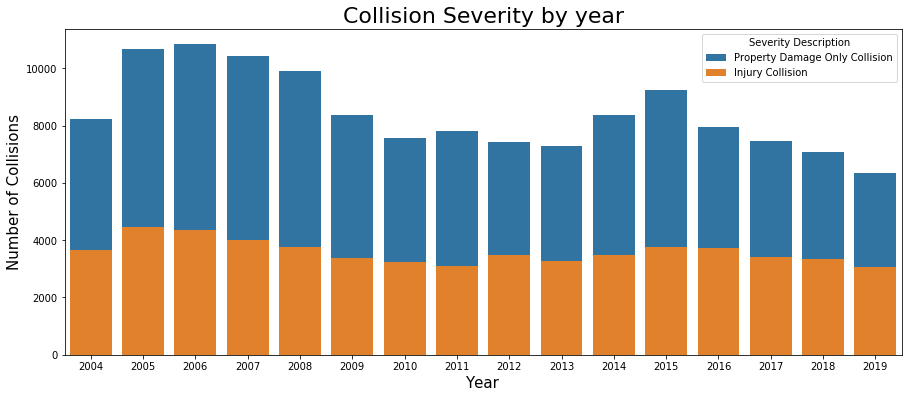

In [9]:
# bar chart of collisions per year

years=['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

plt.figure(figsize=(15,6))
ax = sns.countplot(x='year', hue='severitydesc', hue_order=['Property Damage Only Collision', 'Injury Collision'],data=data_df,
                    dodge=False)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by year', fontsize=22)
ax.set_xticklabels(years)
ax.legend(title='Severity Description');

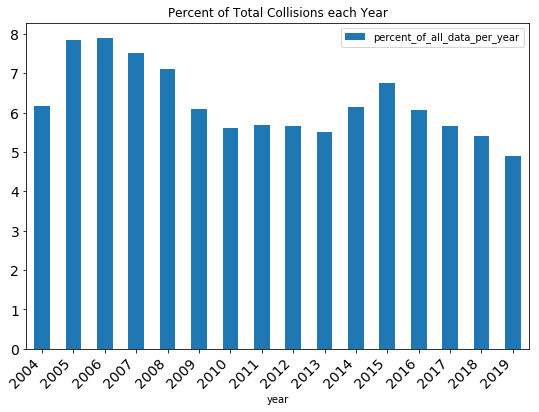

In [10]:

#data1_df["month"] = data1_df["incdttm"].map(lambda x: x.strftime('%m'))




df_yr = round(100*(data_df[["year",
                       "objectid"]].groupby(by=["year"]).count()/len(data_df)), 3)
df_yr = df_yr.rename(columns={"objectid": "percent_of_all_data_per_year"})
#df_yr
#print("lc_data_df shape with year and month columns, but without the 2020 data: {}".format(data1_df.shape))

# bar chart of collisions per year

df_yr.plot(kind='bar', figsize=(9, 6));
plt.title("Percent of Total Collisions each Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.grid(False);
plt.show();

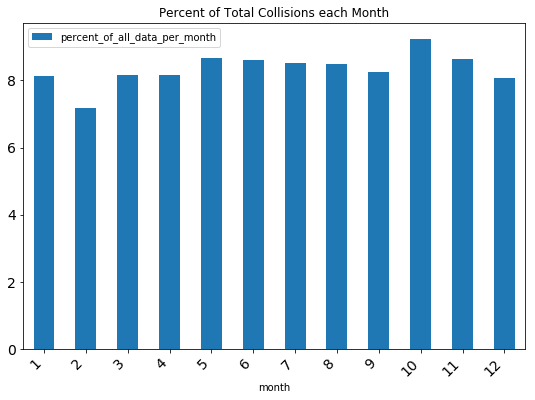

In [11]:
# looking at incidents over time to see the monthly distribution of the data

df_month = round(100*(data_df[["month",
                       "objectid"]].groupby(by=["month"]).count()/len(data_df)), 3)
df_month = df_month.rename(columns={"objectid": "percent_of_all_data_per_month"})
#df_month

# bar chart of collisions per month
#months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df_month.plot(kind='bar', figsize=(9, 6));
plt.title("Percent of Total Collisions each Month");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.grid(False);
plt.show();

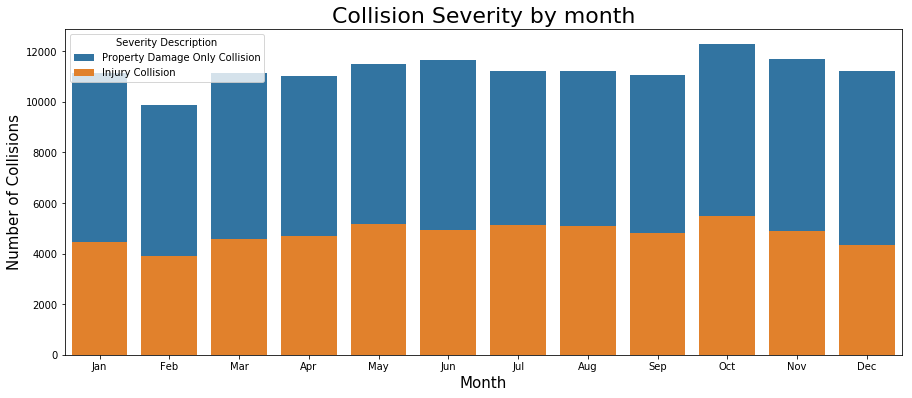

In [12]:
# bar chart of collisions per day

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(15,6))
ax = sns.countplot(x='month', hue='severitydesc', hue_order=['Property Damage Only Collision', 'Injury Collision'],data=data_df,
                    dodge=False)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by month', fontsize=22)
ax.set_xticklabels(months)
ax.legend(title='Severity Description');

It can be highlighted that October is the month with more collisions and February the least

No handles with labels found to put in legend.


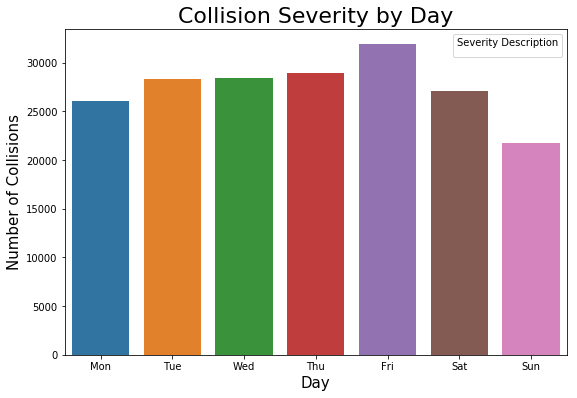

In [13]:
# bar chart of collisions per day

data_df["day"] = pd.DatetimeIndex(data_df.incdttm).weekday  # alternate method

#lc_data_df['Day'] = lc_data_df['INCDTTM'].dt.weekday
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(9,6))
ax = sns.countplot(x='day', data=data_df,
                    dodge=False)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Day', fontsize=22)
ax.set_xticklabels(days)
ax.legend(title='Severity Description');

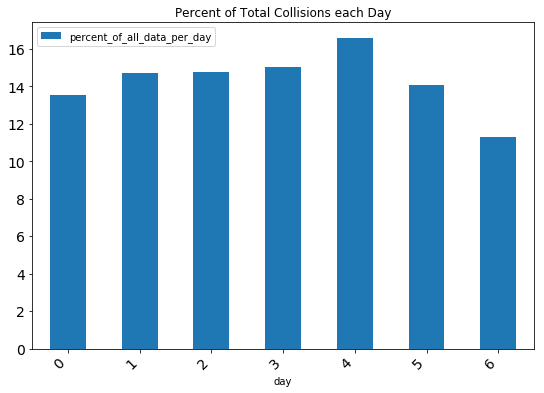

In [14]:
#data1_df["day"] = pd.DatetimeIndex(data1_df.incdttm).weekday  # alternate method

df_day = round(100*(data_df[["day",
                       "objectid"]].groupby(by=["day"]).count()/len(data_df)), 3)
df_day = df_day.rename(columns={"objectid": "percent_of_all_data_per_day"})

# bar chart of collisions per year
df_day.plot(kind='bar', figsize=(9, 6));
plt.title("Percent of Total Collisions each Day");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.grid(False);
plt.show();


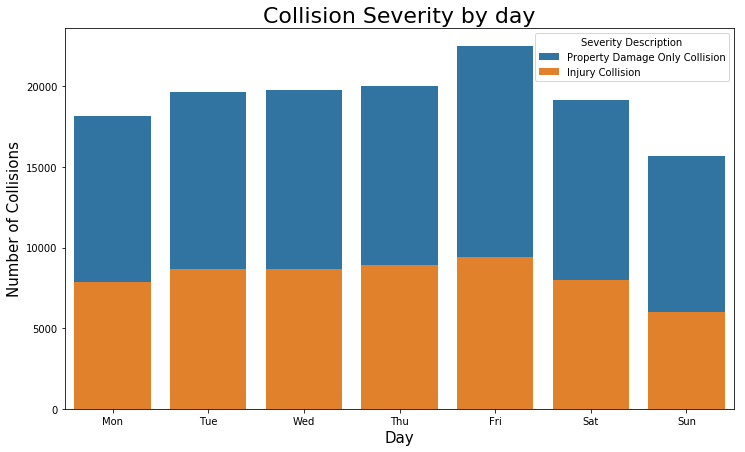

In [15]:
# bar chart of collisions per day

days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(12,7))
ax = sns.countplot(x='day', hue='severitydesc', hue_order=['Property Damage Only Collision', 'Injury Collision'],data=data_df,
                    dodge=False)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by day', fontsize=22)
ax.set_xticklabels(days)
ax.legend(title='Severity Description');

In [16]:
data1_df = data_df.drop(data_df[data_df.incdttm_count < 15].index)

In [17]:
data1_df[["incdttm","incdttm_count","incdate"]].head()

,incdttm,incdttm_count,incdate
0,2013-03-27 14:54:00,20,2013/03/27 00:00:00+00
1,2006-12-20 18:55:00,21,2006/12/20 00:00:00+00
2,2004-11-18 10:20:00,22,2004/11/18 00:00:00+00
3,2013-03-29 09:26:00,20,2013/03/29 00:00:00+00
4,2004-01-28 08:04:00,20,2004/01/28 00:00:00+00


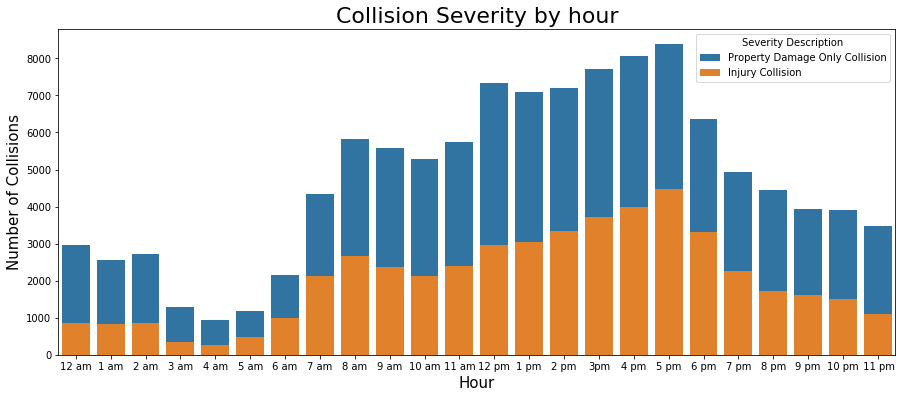

In [18]:
# bar chart of collisions per hour


data1_df["hour"] = pd.DatetimeIndex(data1_df.incdttm).hour  # alternate method

hours=['12 am','1 am','2 am','3 am','4 am','5 am','6 am',
       '7 am','8 am','9 am','10 am','11 am','12 pm','1 pm',
       '2 pm','3pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
       '10 pm',' 11 pm']
plt.figure(figsize=(15,6))
#data1_df["Hour"].plot(kind='bar', figsize=(9, 6));
ax = sns.countplot(x='hour', hue='severitydesc', hue_order=['Property Damage Only Collision', 'Injury Collision'],data=data1_df,
                    dodge=False)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by hour', fontsize=22)
ax.set_xticklabels(hours)
ax.legend(title='Severity Description');

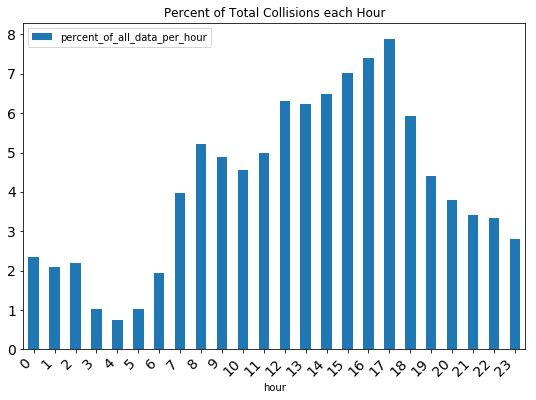

In [19]:
data1_df["hour"] = pd.DatetimeIndex(data1_df.incdttm).hour  # alternate method

hours=['12 am','1 am','2 am','3 am','4 am','5 am','6 am',
       '7 am','8 am','9 am','10 am','11 am','12 pm','1 pm',
       '2 pm','3pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
       '10 pm',' 11 pm']

df_hour = round(100*(data1_df[["hour",
                       "objectid"]].groupby(by=["hour"]).count()/len(data1_df)), 3)
df_hour = df_hour.rename(columns={"objectid": "percent_of_all_data_per_hour"})

# bar chart of collisions per year
df_hour.plot(kind='bar', figsize=(9, 6));
plt.title("Percent of Total Collisions each Hour");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.grid(False);
plt.show();

In [20]:
df_hour.describe()

,percent_of_all_data_per_hour
count,24.000000
mean,4.166625
std,2.123165
min,0.742000
25%,2.313500
50%,4.196500
75%,6.008250
max,7.894000


In [21]:
#'personcount','pedcount',
#               'pedcylcount','vehcount','incdate','incdttm','junctiontype','sdot_coldesc',
#               'weather','roadcond','lightcond']]

count    192428.000000
mean          2.445881
std           1.349128
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: personcount, dtype: float64

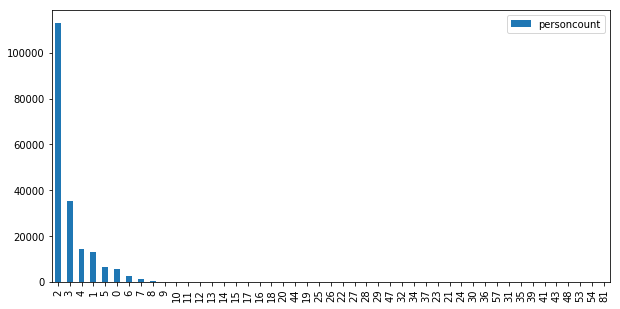

In [22]:
data_df['personcount'].value_counts().to_frame().plot.bar(figsize=(10, 5))
data_df['personcount'].describe()


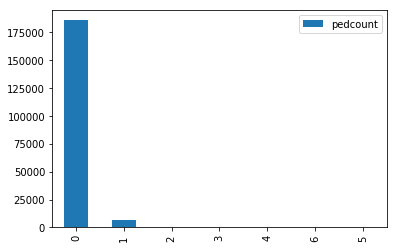

In [23]:
data_df['pedcount'].value_counts().to_frame().plot.bar();


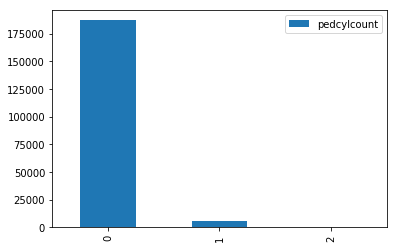

In [24]:
data_df['pedcylcount'].value_counts().to_frame().plot.bar();


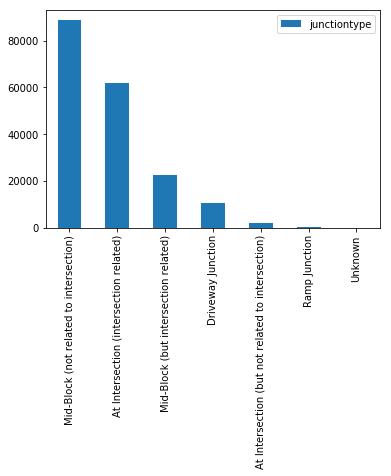

In [25]:
data_df['junctiontype'].value_counts().to_frame().plot.bar();


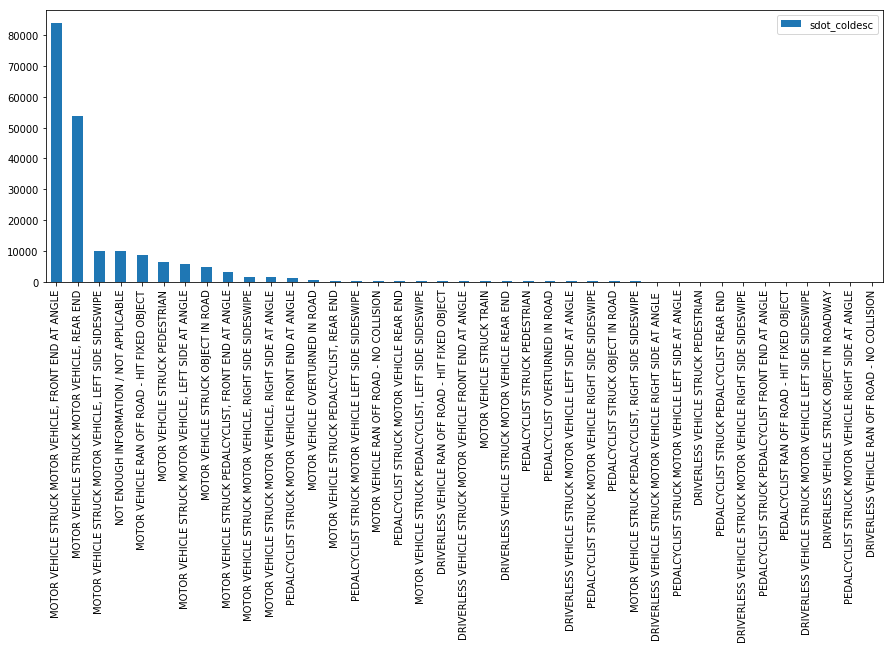

In [26]:
data_df['sdot_coldesc'].value_counts().to_frame().plot.bar(figsize=(15, 5));


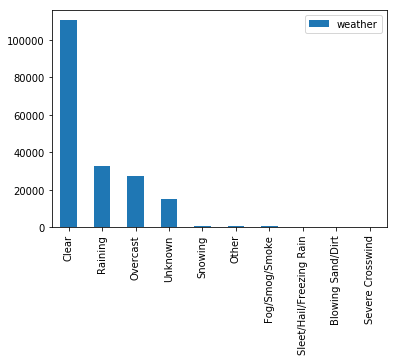

In [27]:
data_df['weather'].value_counts().to_frame().plot.bar();


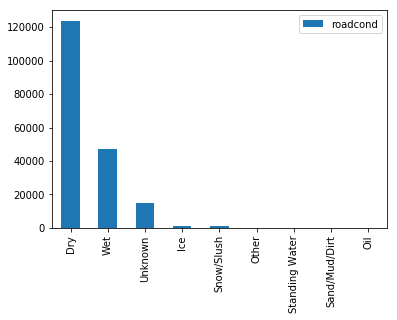

In [28]:
data_df['roadcond'].value_counts().to_frame().plot.bar();


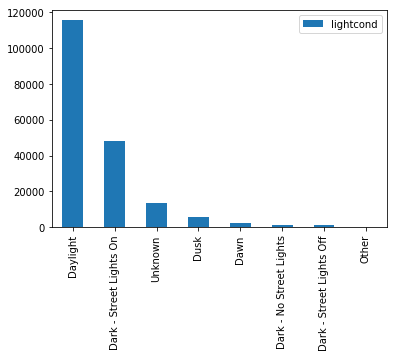

In [29]:
data_df['lightcond'].value_counts().to_frame().plot.bar();

## Location

The heavier the traffic is, the more likely there is to be an accident. I will explore where accidents are concentrated; also, these locations may have the highest amounts of traffic jams.

Firstly, I will use the columns x and y as they will be able to be plotted. I will also review the column 'locations'.

In [30]:
#data1_df['location'].value_counts().plot.bar(figsize=(15, 5)).nlargest(10)

In [83]:
# In order to plot the locations with the higher number of traffic accidents we need to count these coordinates.

data_df['combined'] = list(zip(data_df.y, data_df.x))
totdf= data_df['combined']

sumXY= totdf.value_counts().to_frame('Total accidents').head(10)
sumXY


,Total accidents
"(47.7086545, -122.3326533)",264
"(47.717173100000004, -122.34489609999999)",251
"(47.60416123, -122.32807859999998)",247
"(47.72503555, -122.34499679999999)",235
"(47.57967346, -122.2991597)",230
"(47.57094178, -122.35113390000002)",205
"(47.64717249, -122.3472943)",187
"(47.61299081, -122.3458631)",161
"(47.60726631, -122.3324513)",158
"(47.52281564, -122.26998789999999)",152


In [111]:
sumXY['locations'] = sumXY.index

sumXY.dtypes



Total accidents     int64
locations          object
dtype: object

In [58]:
data_df[['combined','y','x']].head()

,combined,y,x
0,"(47.70314032, -122.32314840000002)",47.703140,-122.323148
1,"(47.64717249, -122.3472943)",47.647172,-122.347294
2,"(47.60787143, -122.33453999999999)",47.607871,-122.334540
3,"(47.60480289, -122.3348033)",47.604803,-122.334803
4,"(47.54573946, -122.3064263)",47.545739,-122.306426


In [31]:
#We can study the number of accidents per location, but these can not be plotted in a map

locdf = data_df['location'].value_counts().to_frame('Total accidents')
totdf = locdf.head(10)
totdf

,Total accidents
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,264
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,251
6TH AVE AND JAMES ST,247
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,238
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,235
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,230
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,212
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,205


In [32]:
# Select incidents that involved only property damage 
sev1df = data_df[(data_df.severitycode == 1)]
# Group the dataframe by location to rank locations by the number of severe incidents
sev1df = sev1df['location'].value_counts().to_frame('Property Damage Only Collisions')
# Select the top 7 locations
less_sev = sev1df.head(10)
less_sev

,Property Damage Only Collisions
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,198
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,185
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,175
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,170
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,148
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,144
6TH AVE AND JAMES ST,143
1ST AVE BETWEEN BLANCHARD ST AND BELL ST,140
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,137
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,133


In [33]:
# Select incidents that involved injury 
sev2df = data_df[(data_df.severitycode == 2)]
# Group the dataframe by location to rank locations by the number of severe incidents
sev2df = sev2df['location'].value_counts().to_frame('Injury Collision')
# Select the top 7 locations
more_sev = sev2df.head(10)
more_sev

,Injury Collision
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,118
6TH AVE AND JAMES ST,104
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,94
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,93
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,87
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,86
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,78
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,77
5TH AVE AND SPRING ST,73
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP,68


## Map with locations

In [36]:
#Installing Folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [118]:
locations=sumXY['locations']
locationlist = locations.values.tolist()
len(locationlist)
locationlist[0]

(47.7086545, -122.3326533)

In [132]:
seattle = folium.Map(location=[47.6062,-122.3321],zoom_start=10)
#Create a group for the collisions in the dataframe
collisions=folium.map.FeatureGroup()


for point in range(0, len(locationlist)):
   collisions.add_child(
       folium.features.CircleMarker(
           locationlist[point],
           radius=5,
           color='blue',
           fill=False,
           fill_color='blue',
           fill_opacity=0.6
       )
   )
seattle.add_child(collisions)

# Methodology

First we ensure that we have a comparable number of SEVERITY codes 1 and 2. If not we re-sample the data.

In [39]:
data_df['severitycode'].value_counts()

1    134923
2     57505
Name: severitycode, dtype: int64

In [40]:
data_df.columns

Index(['severitycode', 'x', 'y', 'objectid', 'inckey', 'coldetkey', 'reportno',
       'status', 'addrtype', 'intkey', 'location', 'exceptrsncode',
       'exceptrsndesc', 'severitycode.1', 'severitydesc', 'collisiontype',
       'personcount', 'pedcount', 'pedcylcount', 'vehcount', 'incdate',
       'incdttm', 'junctiontype', 'sdot_colcode', 'sdot_coldesc',
       'inattentionind', 'underinfl', 'weather', 'roadcond', 'lightcond',
       'pedrownotgrnt', 'sdotcolnum', 'speeding', 'st_colcode', 'st_coldesc',
       'seglanekey', 'crosswalkkey', 'hitparkedcar', 'incdttm_count', 'year',
       'month', 'day'],
      dtype='object')

In [41]:
data_temp_df=data_df[['severitycode','x','y','personcount','pedcount',
               'pedcylcount','vehcount','incdttm','junctiontype','sdot_coldesc',
               'weather','roadcond','lightcond','month','day']]
#,'objectid'

In [42]:
data_temp_df.isna().sum()

severitycode       0
x               5320
y               5320
personcount        0
pedcount           0
pedcylcount        0
vehcount           0
incdttm            0
junctiontype    6314
sdot_coldesc       0
weather         4092
roadcond        4027
lightcond       4186
month              0
day                0
dtype: int64

In [43]:
data_temp_df = data_temp_df.dropna(subset=['junctiontype',
               'weather','roadcond','lightcond'])
data_temp_df.isna().sum()


severitycode       0
x               3105
y               3105
personcount        0
pedcount           0
pedcylcount        0
vehcount           0
incdttm            0
junctiontype       0
sdot_coldesc       0
weather            0
roadcond           0
lightcond          0
month              0
day                0
dtype: int64

In [44]:
data_temp_df.shape

(181955, 15)

In [45]:
#Remove all Unknown values

data_temp_df = data_temp_df[data_temp_df.lightcond != 'Unknown']
data_temp_df = data_temp_df[data_temp_df.roadcond != 'Unknown']
data_temp_df = data_temp_df[data_temp_df.weather != 'Unknown']
data_temp_df = data_temp_df[data_temp_df.junctiontype != 'Unknown']

data_temp_df.shape

(166803, 15)

In [46]:
# Check data types and transform to integers

data_temp_df.dtypes

severitycode             int64
x                      float64
y                      float64
personcount              int64
pedcount                 int64
pedcylcount              int64
vehcount                 int64
incdttm         datetime64[ns]
junctiontype            object
sdot_coldesc            object
weather                 object
roadcond                object
lightcond               object
month                    int64
day                      int64
dtype: object

In [47]:
data_temp_df['junctiontype'].value_counts()


Mid-Block (not related to intersection)              74759
At Intersection (intersection related)               59018
Mid-Block (but intersection related)                 21152
Driveway Junction                                     9919
At Intersection (but not related to intersection)     1798
Ramp Junction                                          157
Name: junctiontype, dtype: int64

In [48]:
data_temp_df['junctiontype'].replace(to_replace=['Unknown','Ramp Junction','At Intersection (but not related to intersection)',
                                                 'Driveway Junction','Mid-Block (but intersection related)',
                                                 'At Intersection (intersection related)','Mid-Block (not related to intersection)'], 
                                     value=[1,1,2,3,4,5,6],inplace=True)
data_temp_df['junctiontype'].value_counts()

6    74759
5    59018
4    21152
3     9919
2     1798
1      157
Name: junctiontype, dtype: int64

In [49]:
data_temp_df['weather'].replace(to_replace=['Clear','Unknown','Other','Partly Cloudy','Overcast','Severe Crosswind','Raining','Snowing','Blowing Sand/Dirt','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain'], value=[0,1,1,2,3,4,5,6,7,8,9],inplace=True)
data_temp_df['weather'].value_counts()

0    106760
5     31984
3     26294
6       798
8       544
1       249
9       106
7        43
4        25
Name: weather, dtype: int64

In [50]:
data_temp_df['roadcond'].replace(to_replace=['Dry','Unknown','Other','Sand/Mud/Dirt','Standing Water','Snow/Slush','Wet','Oil','Ice'], value=[0,1,1,2,3,4,5,6,7],inplace=True)
data_temp_df['roadcond'].value_counts()

0    119246
5     45332
7      1073
4       827
3       104
1       102
2        61
6        58
Name: roadcond, dtype: int64

In [51]:
data_temp_df['lightcond'].replace(to_replace=['Daylight','Unknown','Other','Dawn','Dusk','Dark - Street Lights On','Dark - Unknown Lighting','Dark - Street Lights Off','Dark - No Street Lights'], value=[0,1,1,2,3,4,5,6,6],inplace=True)
data_temp_df['lightcond'].value_counts()

0    110546
4     45748
3      5538
6      2428
2      2361
1       182
Name: lightcond, dtype: int64

In [52]:
data_temp_df.dtypes

severitycode             int64
x                      float64
y                      float64
personcount              int64
pedcount                 int64
pedcylcount              int64
vehcount                 int64
incdttm         datetime64[ns]
junctiontype             int64
sdot_coldesc            object
weather                  int64
roadcond                 int64
lightcond                int64
month                    int64
day                      int64
dtype: object

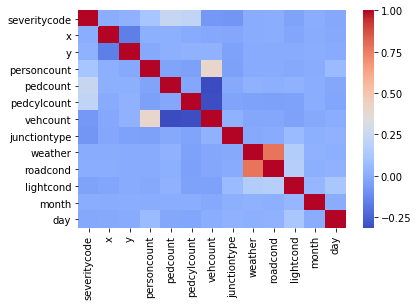

In [53]:
# Ascertain the correlations between the variables

corr = data_temp_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [54]:
data_temp_df["severitycode"].value_counts()


1    111669
2     55134
Name: severitycode, dtype: int64

We can see that there is not enough severity codes 2 so we re-sample.



In [55]:
from sklearn.utils import resample

df_a=data_temp_df[data_temp_df.severitycode ==1]
df_b=data_temp_df[data_temp_df.severitycode ==2]

df_c=resample(df_a,replace=False,n_samples=df_b.shape[0], random_state=42)
df_n=pd.concat([df_c,df_b])

df_n["severitycode"].value_counts()

2    55134
1    55134
Name: severitycode, dtype: int64

## Choose features and target

Label y, 'severitycode'variable has two outputs in our data set: 1—prop damage and 2—injury. A Linear Regression in this case would not be useful in producing appropriate classification since the label has binary outcome. That is why other classifiers will be studied.

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [57]:
Features = ['personcount','pedcount',
               'pedcylcount','vehcount','junctiontype',
               'weather','roadcond','lightcond','month','day']
X = df_n[Features].copy()
y = df_n['severitycode'].copy()

In [58]:
# split data into training set and testing set (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (88214, 10) (88214,)
Test set: (22054, 10) (22054,)


In [59]:
# standardize the data

ss = preprocessing.StandardScaler().fit(X_train.astype(np.float))
X_train = ss.transform(X_train.astype(np.float))
X_test = ss.transform(X_test.astype(np.float))

In [60]:
# Confusion Matrix plotting function

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression Classifier

In [61]:

# find best hyperparameters for logistic regression classifier

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
results_df = pd.DataFrame(index=cs)
results_df.index.name='C'
for s in solvers:
    results = []
    for c in cs:
        LR = LogisticRegression(C=c, solver=s, max_iter=4000, random_state=42).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        j_score = jaccard_similarity_score(y_test, yhat)
        results.append(j_score)
    results_df[s] = results
results_df

,newton-cg,lbfgs,liblinear,sag,saga
C,,,,,
0.0001,0.618663,0.618663,0.618255,0.618754,0.618663
0.0010,0.623198,0.623243,0.623198,0.623243,0.623243
0.0100,0.623968,0.623968,0.623968,0.623968,0.623968
0.1000,0.623923,0.623923,0.623878,0.623923,0.623923
1.0000,0.623923,0.623923,0.623923,0.623923,0.623923
10.0000,0.623923,0.623923,0.623923,0.623923,0.623923
100.0000,0.623923,0.623923,0.623923,0.623923,0.623923


Confusion matrix, without normalization


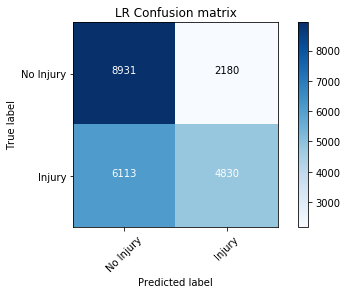

In [62]:
import itertools

# run logistic regression classifier and show results

LR = LogisticRegression(C=0.01, solver='lbfgs', random_state=42).fit(X_train,y_train)
yhat = LR.predict(X_test)
LR_j_score = jaccard_similarity_score(y_test, yhat)
LR_f_score = f1_score(y_test, yhat, average='weighted')
LR_class_report = classification_report(y_test, yhat)
LR_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='LR Confusion matrix')

In [63]:
print('Logistic Regression jaccard score:', round(LR_j_score, 4))
print('Logistic Regression F1 score:', round(LR_f_score, 4))
print('Logistic Regression classification report:\n\n', LR_class_report)

Logistic Regression jaccard score: 0.624
Logistic Regression F1 score: 0.6111
Logistic Regression classification report:

               precision    recall  f1-score   support

           1       0.59      0.80      0.68     11111
           2       0.69      0.44      0.54     10943

   micro avg       0.62      0.62      0.62     22054
   macro avg       0.64      0.62      0.61     22054
weighted avg       0.64      0.62      0.61     22054



## Decision Tree Classifier


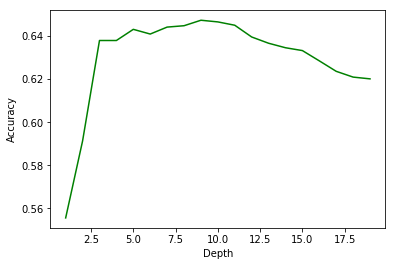

The best accuracy is 0.6472 with depth= 9


In [65]:
# find best hyperparameters for decision tree classifier

depth = 20 #9
mean_acc = np.zeros((depth-1))
for n in range(1,depth): 
    DT = DecisionTreeClassifier(criterion="entropy", max_depth = n, random_state=42).fit(X_train,y_train)
    yhat=DT.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
plt.plot(range(1,depth),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()
print("The best accuracy is", round(mean_acc.max(), 4), "with depth=", mean_acc.argmax()+1)

Confusion matrix, without normalization


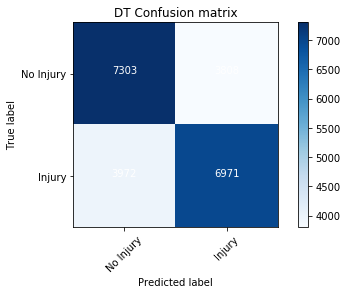

In [74]:
# run decision tree classifier and show results

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 9, random_state=42).fit(X_train, y_train)
yhat = DT.predict(X_test)
DT_j_score = jaccard_similarity_score(y_test, yhat)
DT_f_score = f1_score(y_test, yhat, average='weighted')
DT_class_report = classification_report(y_test, yhat)
DT_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='DT Confusion matrix')

In [67]:
print('Decision Tree jaccard score:', round(DT_j_score, 4))
print('Decision Tree F1 score:', round(DT_f_score, 4))
print('Decision Tree classification report:\n\n', DT_class_report)

Decision Tree jaccard score: 0.6472
Decision Tree F1 score: 0.6472
Decision Tree classification report:

               precision    recall  f1-score   support

           1       0.65      0.66      0.65     11111
           2       0.65      0.64      0.64     10943

   micro avg       0.65      0.65      0.65     22054
   macro avg       0.65      0.65      0.65     22054
weighted avg       0.65      0.65      0.65     22054



## K-Nearest Neighbors (KNN) Classifier

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.


In [76]:
# find best hyperparameters for k-nearest neighbors classifier, odd k only

Ks = 50 #38
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat= KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])




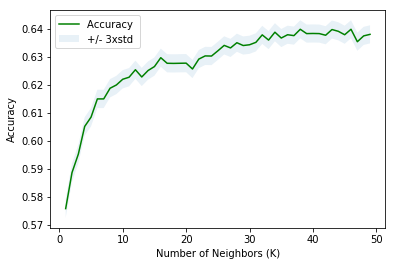

The best accuracy was with 0.6399 with k= 38


In [77]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))

plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()
print("The best accuracy was with", round(mean_acc.max(), 4), "with k=", mean_acc.argmax()+1)

Confusion matrix, without normalization


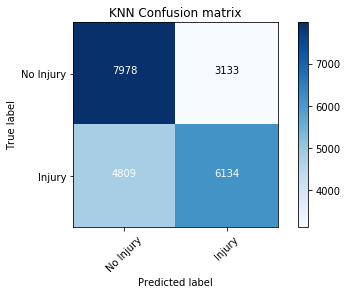

In [80]:
# run k-nearest neighbors classifier and show results

KNN = KNeighborsClassifier(n_neighbors = 38).fit(X_train,y_train)
yhat = KNN.predict(X_test)
KNN_j_score = jaccard_similarity_score(y_test, yhat)
KNN_f_score = f1_score(y_test, yhat, average='weighted')
KNN_class_report = classification_report(y_test, yhat)
KNN_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='KNN Confusion matrix')

In [81]:
print('KNN jaccard score:', round(KNN_j_score, 4))
print('KNN F1 score:', round(KNN_f_score, 4))
print('KNN classification report:\n\n', KNN_class_report)

KNN jaccard score: 0.6399
KNN F1 score: 0.6376
KNN classification report:

               precision    recall  f1-score   support

           1       0.62      0.72      0.67     11111
           2       0.66      0.56      0.61     10943

   micro avg       0.64      0.64      0.64     22054
   macro avg       0.64      0.64      0.64     22054
weighted avg       0.64      0.64      0.64     22054



## Random Forest Classifier


In [ ]:
# # find best hyperparameters for random forest classifier, increments of 50
# # 
# depth = 1000
# mean_acc = np.zeros((depth-1))
# for n in range(1,depth,50): 
#     RF = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train,y_train)
#     yhat=RF.predict(X_test)
#     mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
# plt.plot(range(1,depth,50),mean_acc[::50],'g')
# plt.ylabel('Accuracy')
# plt.xlabel('n_estimators')
# plt.show()
# print( "The best accuracy was with", round(mean_acc.max(), 4), "with n_estimators=", mean_acc.argmax()+1)

In [ ]:
# # find best hyperparameters for random forest classifier
# # I narrowed down the n_estimators previously to the range 900-910

# depth = 920
# mean_acc = np.zeros((depth-1))
# for n in range(890,depth): 
#     RF = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train,y_train)
#     yhat=RF.predict(X_test)
#     mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
# plt.plot(range(890,depth),mean_acc[889:919],'g')
# plt.ylabel('Accuracy')
# plt.xlabel('n_estimators')
# plt.show()
# print( "The best accuracy was with", round(mean_acc.max(), 4), "with n_estimators=", mean_acc.argmax()+1)

In [ ]:
# # run random forest classifier and show results

# RF = RandomForestClassifier(n_estimators=547, random_state=42).fit(X_train, y_train)
# yhat = RF.predict(X_test)
# RF_j_score = jaccard_similarity_score(y_test, yhat)
# RF_f_score = f1_score(y_test, yhat, average='weighted')
# RF_class_report = classification_report(y_test, yhat)
# RF_dict = classification_report(y_test, yhat, output_dict=True)
# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
# np.set_printoptions(precision=2)
# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='RF Confusion matrix')

In [ ]:
# print('RF jaccard score:', round(RF_j_score, 4))
# print('RF F1 score:', round(RF_f_score, 4))
# print('RF classification report:\n\n', RF_class_report)

## Support Vector Machine (SVM) Classifier

Confusion matrix, without normalization


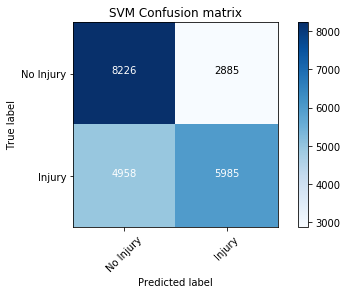

In [78]:
# SVM does not do well with large datasets so I only used the 'rbf' kernel

SVM = svm.SVC(kernel='rbf', gamma='auto', random_state=42).fit(X_train, y_train)
yhat = SVM.predict(X_test)
SVM_j_score = jaccard_similarity_score(y_test, yhat)
SVM_f_score = f1_score(y_test, yhat, average='weighted')
SVM_class_report = classification_report(y_test, yhat)
SVM_dict = classification_report(y_test, yhat, output_dict=True)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Injury','Injury'],normalize=False,  title='SVM Confusion matrix')

In [79]:

print('SVM jaccard score:', round(SVM_j_score, 4))
print('SVM F1 score:', round(SVM_f_score, 4))
print('SVM classification report:\n\n', SVM_class_report)

SVM jaccard score: 0.6444
SVM F1 score: 0.6409
SVM classification report:

               precision    recall  f1-score   support

           1       0.62      0.74      0.68     11111
           2       0.67      0.55      0.60     10943

   micro avg       0.64      0.64      0.64     22054
   macro avg       0.65      0.64      0.64     22054
weighted avg       0.65      0.64      0.64     22054



# Results
I condensed some of the results into a table for comparison and discuss.

In [82]:

# get results from all the classifiers to compare

J_results = {'Logistic Regression':round(LR_j_score, 4),
             'Decision Tree':round(DT_j_score, 4),
             'K-Nearest Neighbors':round(KNN_j_score, 4),
             'Support Vector Machine':round(SVM_j_score, 4)}
F_results = {'Logistic Regression':round(LR_f_score, 4),
             'Decision Tree':round(DT_f_score, 4),
             'K-Nearest Neighbors':round(KNN_f_score, 4),
             'Support Vector Machine':round(SVM_f_score, 4)}
Class_F1_results = {'Logistic Regression':round(LR_dict['2']['f1-score'], 4),
                    'Decision Tree':round(DT_dict['2']['f1-score'], 4),
                    'K-Nearest Neighbors':round(KNN_dict['2']['f1-score'], 4),
                    'Support Vector Machine':round(SVM_dict['2']['f1-score'], 4)}
Class_Recall_results = {'Logistic Regression':round(LR_dict['2']['recall'], 4),
                        'Decision Tree':round(DT_dict['2']['recall'], 4),
                        'K-Nearest Neighbors':round(KNN_dict['2']['recall'], 4),
                        'Support Vector Machine':round(SVM_dict['2']['recall'], 4)}

In [83]:
final_results = pd.DataFrame([J_results,F_results,Class_F1_results,Class_Recall_results],
                        index=['Jaccard Score','F1 Score','Injury Class F1 Score','Injury Class Recall Score'])
final_results

,Decision Tree,K-Nearest Neighbors,Logistic Regression,Support Vector Machine
Jaccard Score,0.6472,0.6399,0.6240,0.6444
F1 Score,0.6472,0.6376,0.6111,0.6409
Injury Class F1 Score,0.6418,0.6070,0.5381,0.6041
Injury Class Recall Score,0.6370,0.5605,0.4414,0.5469


Decision Tree Classifier has the best accuracy and F1 score. 
F1 Score and the recall score for the injury class as it is important to focus on predicting the injuries correctly. 


Now, we can see which features are the biggest factor in determining whether or not injury occurs when there's a collision. Additionally, I will graph each feature with respect to injury for detail.

In [84]:
# get features and target

X = data_temp_df[Features].copy()
y = data_temp_df['severitycode'].copy()
print('Full data set:', X.shape, y.shape)

Full data set: (166803, 10) (166803,)


In [85]:
# standardize data and final models

X = preprocessing.StandardScaler().fit_transform(X.astype(np.float))
Final_Model =DecisionTreeClassifier(criterion="entropy", max_depth = 9, random_state=42).fit(X, y)


In [86]:
Final_Model


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [87]:
# extract importances and create DataFrame for graph

importances = Final_Model.feature_importances_
feature_importances = []
for feature, score in zip(Features, importances):
    feature_importances.append([feature, round(score, 2)])
feature_importances_df = pd.DataFrame(sorted(feature_importances, key=lambda x:x[1], reverse=True),
                                columns=['Feature','Importance Score'])
feature_importances_df

,Feature,Importance Score
0,pedcount,0.33
1,pedcylcount,0.26
2,personcount,0.20
3,junctiontype,0.11
4,vehcount,0.06
5,lightcond,0.01
6,month,0.01
7,day,0.01
8,weather,0.00
9,roadcond,0.00


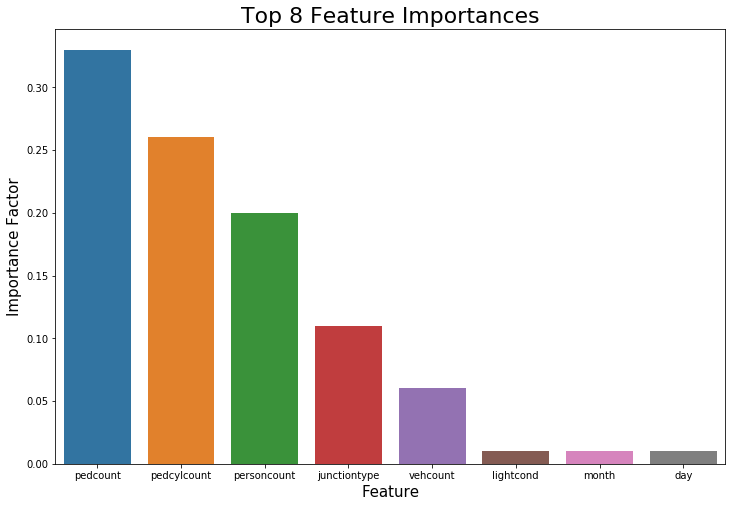

In [89]:

# Graph of top 8 Features

plt.figure(figsize=(12,8))
ax = sns.barplot(x = feature_importances_df['Feature'][:8], y=feature_importances_df['Importance Score'][:8])
ax.set_xlabel('Feature', fontsize=15)
ax.set_ylabel('Importance Factor', fontsize=15)
ax.set_title('Top 8 Feature Importances', fontsize=22)
plt.show()


# Discussion

Jaccard and F1 Score were used to analyses the results of the ML models. Each model had similar metrics but Decision Tree was the strongest. Choosing different hyperparameters values helped to improve the predictive power of the models.
Features with the biggest influence in the model were ‘pedcount’ and ‘pedcylcount’. This seems logical, as pedestrians and cyclists receive the impact with low protection, resulting in possible injuries. Other variables with high influence were ‘pesoncount’, ‘junctiontype’ and ‘vehcount’.
It is remarkable that light, weather, road conditions have low influence in the model meaning they do not affect an accident to be mild or severe.
Influence of month and day have been taken into account. In a previous version of the model, ‘hour’ was taken into account as well. As it is depicted in the chart, during daytime appears to be more accidents than during nighttime, but as according to the model, it has no influence on the severity of the accident. Due to the great amount of time it required to run the model it was dropped in the final version.
Plotting top 10 locations with highest traffic accidents can help the shareholders to take actions to this specific points. Top 10 locations concentrate in the city center (3 locations), at the north of the city (3 locations), 2 bridges and 2 locations of the same avenue. As it was mentioned previously, these locations may suffer the highest amounts of traffic jams.  

# Conclusion

In this capstone the traffic accidents of Seattle since 2004 have been studied. Several models have been built helped by python and sklearn. In the process, data has been analyzed, plotted and processed to achieve the best model possible. 
Some variables had to be dropped as the amount of data was low; in other cases, accidents were not taken into account because null or unknown values for a studied variable.
It must be highlighted that when analyzing higher number of accidents by ‘location’ there were several that had not coordinates associated, making difficult to plot it on a map. Coordinates has been studied instead.
It is interesting the influences of the variables studied in the outcome of an accident. From this analysis it can be concluded that a special attention has to be made in protect pedestrians and cyclists as they have contributed the most to the severity of the accident.
On the other hand, specific actions should be taken to areas with higher rates of accidents, and possible of traffic jams. Studying in more detail these areas and lowering their rates would help the city and people to be less stressed and to reduce the number of injured.
